In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Color mapping

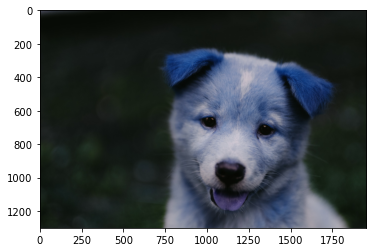

In [2]:
img1 = cv2.imread('00-puppy.jpg')
plt.imshow(img1)

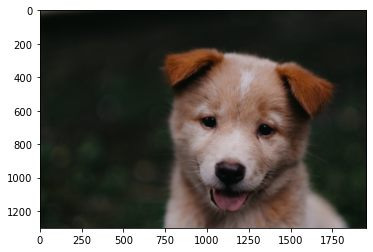

In [3]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

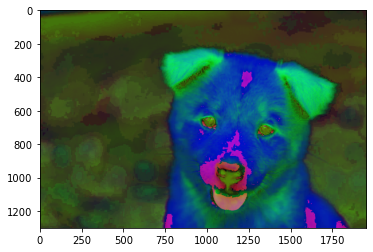

In [7]:
img1 = cv2.imread('00-puppy.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
plt.imshow(img1)

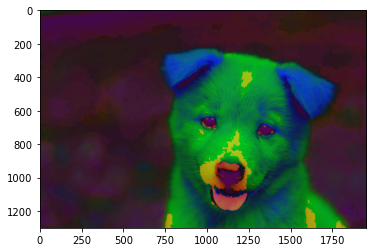

In [8]:
img1 = cv2.imread('00-puppy.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HLS)
plt.imshow(img1)

# Image Blending & Pasting

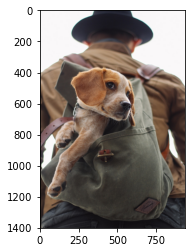

In [10]:
img_a = cv2.imread('dog_backpack.png')
img_a = cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB)
plt.imshow(img_a)

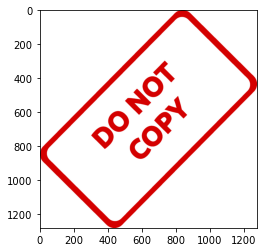

In [11]:
img_b = cv2.imread('watermark_no_copy.png')
img_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB)
plt.imshow(img_b)

In [12]:
img_a.shape

(1401, 934, 3)

In [13]:
img_b.shape

(1280, 1277, 3)

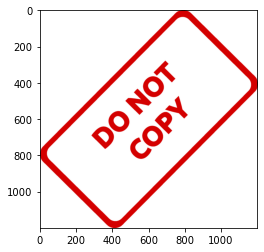

In [15]:
# resize both image
img_a = cv2.resize(img_a, (1200, 1200))
img_b = cv2.resize(img_b, (1200, 1200))
plt.imshow(img_b)

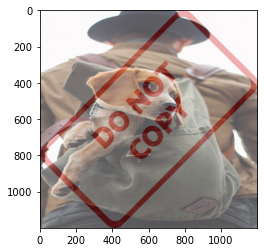

In [21]:
# image blend
blended = cv2.addWeighted(src1 = img_a, alpha = 0.7, src2 = img_b, beta = 0.3, gamma = 0 )
plt.imshow(blended)

$$  img_a * \alpha  + img_b * \beta  + \gamma $$

# overlay image with different size

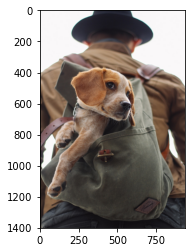

In [28]:
img_a = cv2.imread('dog_backpack.png')
img_a = cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB)

img_large = img_a
plt.imshow(img_large)

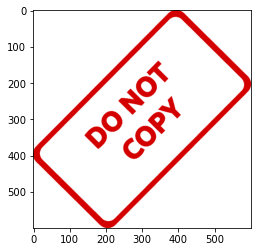

In [35]:
img_b = cv2.imread('watermark_no_copy.png')
img_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB)

img_b = cv2.resize(img_b,(600,600))
img_small = img_b
plt.imshow(img_small)

In [30]:
x_of = 0
y_of = 0

In [32]:
img_large[y_of : y_of + img_small.shape[0], x_of : x_of + img_small.shape[1]] = img_small

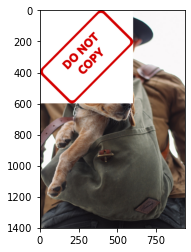

In [42]:
plt.imshow(img_large)

# create region of interest

In [40]:
img_a.shape

(1401, 934, 3)

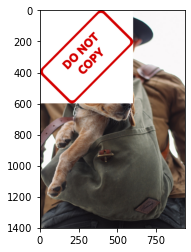

In [41]:
plt.imshow(img_a)

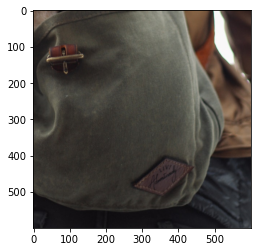

In [95]:
x_of = 934 - 600
y_of = 1401 - 600
rows, cols, channels = img_a.shape
roi = img_a[y_of:1404, x_of:934]
plt.imshow(roi)

# masking

In [80]:
img_b = cv2.imread('watermark_no_copy.png')
img_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY)

img_bgray = cv2.resize(img_b,(600,600))

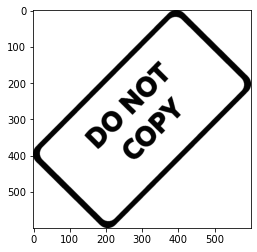

In [81]:
plt.imshow(img_bgray, cmap = 'gray')

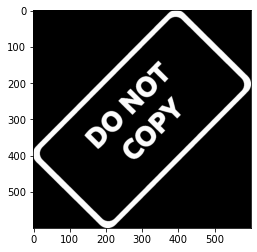

In [82]:
mask_inv = cv2.bitwise_not(img_bgray)
plt.imshow(mask_inv, cmap = 'gray')

In [83]:
white_background = np.full(img_bgray.shape, 255, dtype=np.uint8)
white_background

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [84]:
white_background.shape

(600, 600)

In [85]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
bk.shape

(600, 600)

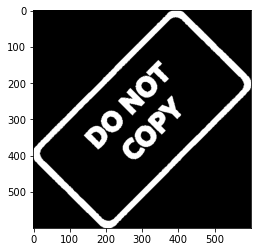

In [86]:
plt.imshow(bk, cmap = 'gray')

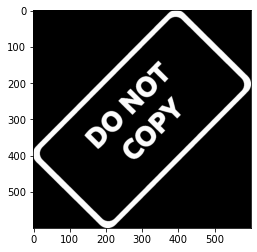

In [92]:
plt.imshow(mask_inv, cmap = 'gray')

In [87]:
img_b = cv2.imread('watermark_no_copy.png')
img_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB)

img_b= cv2.resize(img_b,(600,600))

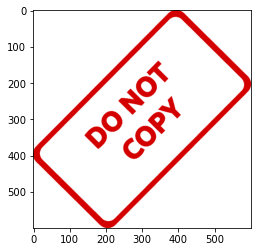

In [93]:
plt.imshow(img_b)

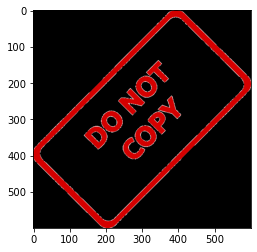

In [90]:
fg = cv2.bitwise_or(img_b, img_b, mask = mask_inv)
plt.imshow(fg)

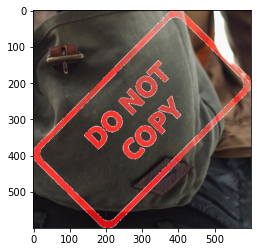

In [99]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

# image thresholding

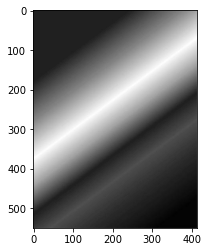

In [104]:
img3 = cv2.imread('rainbow.jpg', 0)
plt.imshow(img3, cmap = 'gray')

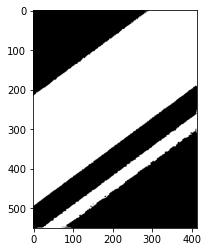

In [111]:
ret,thresh1 = cv2.threshold(img3, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap = 'gray')